Eigenvectors
============

This week we'll be studying the idea of eigenvectors of a matrix. The physical context will be the oscillation of a pair of masses coupled by springs. See the slides for details! There are two separate implementations here:

1. A VPython version (read the comments and execute the corresponding cells)

2. A pylab version (again, read the comments and execute the appropriate cells)



In [1]:
USE_VISUAL=False

In [2]:
#
# Either use this cell, in which case you will be using VPython 
# Note: VPython only works if you have it installed on your local
# computer. Also, stopping a VPython simulation appears to restart the kernel. Save first!
#
if USE_VISUAL:    
    from vpython import *
    from numpy import *
    from vpython import rate


In [3]:
#
# Or use this one, in which case you will be using pylab
#

if not USE_VISUAL:
    %pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#
# Basic functions and definitions used by VPython and pylab versions
#

L=10
kb=10.0
ks=1.0
m=1.0
dt=0.03
t=0.0

x1i=0.4*L/10  # initial displacement from equil, m1
v1i=0.0   # initial vel, m1
x2i=1.0*L/10  # initial displacement from equil, m2
v2i=0.0   # initial vel, m2

s=array([x1i,v1i,x2i,v2i]) # initial state

def derivs_2m(s, t):
    x1=s[0]   # get the variables from the state
    v1=s[1]
    x2=s[2]
    v2=s[3]
    a1 = (-(kb+ks)*x1 + ks*x2)/m
    a2 = (-(kb+ks)*x2 + ks*x1)/m
    return array([v1, a1, v2, a2])
    
def RK4Step(s, dt, t, derivs):
    """
    Take a single RK4 step.
    """
    f1 = derivs(s, t)
    f2 = derivs(s+f1*dt/2.0, t+dt/2.0)
    f3 = derivs(s+f2*dt/2.0, t+dt/2.0)
    f4 = derivs(s+f3*dt, t+dt)
    return s + (f1+2*f2+2*f3+f4)*dt/6.0


In [5]:
#
# VPython: Simulation of 2 coupled masses on springs.
#
if USE_VISUAL:

    canvas()
    
    wallLeft = box(pos=vec(-L,0,0), height=L/2, width=L/2, length=L/10, color=color.green)
    wallRight = box(pos=vec(L,0,0), height=L/2, width=L/2, length=L/10, color=color.green)
    
    m1 = box(pos=vec(-L/3,0,0), height=L/5, width=L/5, length=L/5, color=color.red)
    m2 = box(pos=vec(+L/3,0,0), height=L/5, width=L/5, length=L/5, color=color.red)
    
    vWall=vector(wallLeft.length/2,0,0)  # sorta like axis of wallLeft?
    vMass=vector(m1.length/2,0,0)        # same for the masses
    
    s1 = helix(pos=wallLeft.pos+vWall, axis=(m1.pos-vMass)-(wallLeft.pos+vWall), radius=0.5)
    s2 = helix(pos=m1.pos+vMass, axis=(m2.pos-vMass)-(m1.pos+vMass), radius=0.5)
    s3 = helix(pos=m2.pos+vMass, axis=(wallRight.pos-vWall)-(m2.pos+vMass), radius=0.5)
    
    x10=m1.pos.x  # equilibrium pos of m1
    x20=m2.pos.x  # equilibrium pos of m2

In [6]:
#
# VPython: Simulation of 2 coupled masses on springs.
#
if USE_VISUAL:

    def updateScreen(s):
        x1=s[0]   # get the variables from the state
        v1=s[1]
        x2=s[2]
        v2=s[3]
    
        m1.pos.x = x10+x1  # update mass positions
        m2.pos.x = x20+x2
        
        #
        # now just update spring positions and axes
        #
        
        s1.axis = (m1.pos-vMass)-(wallLeft.pos+vWall)
        s2.pos = m1.pos+vMass
        s2.axis = (m2.pos-vMass)-(m1.pos+vMass)
        s3.pos = m2.pos+vMass
        s3.axis = (wallRight.pos-vWall)-(m2.pos+vMass)
        
    updateScreen(s)

In [7]:
#
# VPython: Simulation of 2 coupled masses on springs.
#
if USE_VISUAL:

    while True:
        rate(30)
        s = RK4Step(s, dt, t, derivs_2m)
        t += dt
        updateScreen(s)


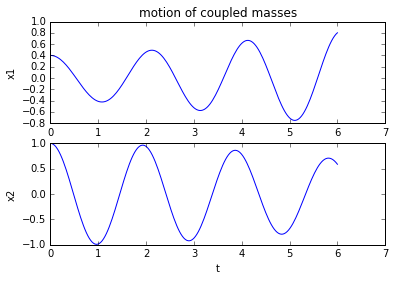

In [8]:
if not USE_VISUAL:
    x1list=[s[0]]
    x2list=[s[2]]
    tlist=[0.0]
    t=0.0
    
    while t<6:
        s = RK4Step(s, dt, t, derivs_2m)
        t += dt
        x1list.append(s[0])
        x2list.append(s[2])
        tlist.append(t)
        
    subplot(211)
    ylabel("x1")
    title("motion of coupled masses")
    plot(tlist,x1list,label="x1")
    subplot(212)
    ylabel("x2")
    xlabel("t")
    plot(tlist,x2list,label="x2")
    


We can also sort out what's happening using the matrix formulation developed in the slides. The eigenvalue problem:

$$\begin{bmatrix} \frac{(k_b+k_s)}{m} & -\frac{k_s}{m} \\ -\frac{k_s}{m} & \frac{(k_b + k_s)}{m} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}  = \frac{k_b}{m} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} $$

Has solutions:

$$\omega^2 = \frac{k_b}{m},\frac{k_b+2k_s}{m}$$

Which corrspond to eigenvectors

$$\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \mathinner|+\rangle =  \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

or 

$$\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \mathinner|-\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix}$$

The neat thing is that we can use the "eig" function in pylab to automaticaly find the eigenvectors and eigenvalues automatically.

See the cell below for an example!


In [9]:
Mat = array([[(kb+ks)/m, -ks/m],
            [-ks/m, (kb+ks)/m]])

vals, vecs = eig(Mat)

print("values:", vals)
print("vec(0):", vecs[:,0])
print("vec(1):", vecs[:,1])

values: [ 12.  10.]
vec(0): [ 0.70710678 -0.70710678]
vec(1): [ 0.70710678  0.70710678]


Project 10
===========

Complete the analyss of three masses connected by springs of equal spring constant.

Find the eigenvalues and eigenvectors for three masses.

Use the RK4 approach as shown above to validate that the eigenvalues you compute are correct.

A => 0.572800804305
omega**2 => 9.74989669831
phi => -0.210947598927


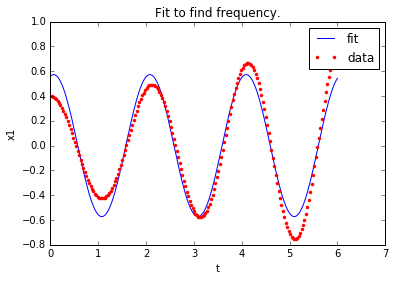

In [10]:
from scipy.optimize import curve_fit

def cosFit(t, A, omega, phi):
    """
    Function def for a cosine fit
    """
    return A*cos(omega*t+phi)

x1a=array(x1list)
ta=array(tlist)
popt, pcov = curve_fit(cosFit, ta, x1a, p0=(0.707, sqrt(10.0), 0.0))

A=popt[0]
omega=popt[1]
phi=popt[2]

print("A =>", A)
print("omega**2 =>", omega**2)
print("phi =>", phi)

title('Fit to find frequency.')
xlabel('t')
ylabel('x1')
plot(ta, cosFit(ta, A, omega, phi), 'b-', label="fit")
plot(ta, x1a, 'r.', label='data')
legend()